In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/ADMIN/Desktop/DATASETS/heart_attack.csv")

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
data=data.drop(data[['Patient ID','Country','Continent','Hemisphere','Income']],axis=1)

In [5]:
data

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,Healthy,1,1,8,10.806373,19.655895,67,7,7,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,Healthy,0,0,8,3.833038,23.993866,617,4,9,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,Average,1,0,5,2.375214,35.406146,527,4,4,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,Unhealthy,1,1,5,0.029104,27.294020,114,2,8,0


In [6]:
data['Blood Pressure']=data['Blood Pressure'].str.replace('/','')

In [7]:
data['Blood Pressure']

0        15888
1        16593
2        17499
3       163100
4         9188
         ...  
8758      9476
8759    157102
8760     16175
8761     11967
8762     13867
Name: Blood Pressure, Length: 8763, dtype: object

In [8]:
data['Blood Pressure']=data['Blood Pressure'].astype(float)

In [9]:
data['Blood Pressure'].unique()

array([15888., 16593., 17499., ..., 13794.,  9476., 11967.])

In [10]:
data['Obesity'].value_counts()

Obesity
1    4394
0    4369
Name: count, dtype: int64

In [11]:
data['Smoking'].value_counts()

Smoking
1    7859
0     904
Name: count, dtype: int64

In [12]:
data.groupby('Smoking')['Sex'].value_counts()

Smoking  Sex   
0        Female     904
1        Male      6111
         Female    1748
Name: count, dtype: int64

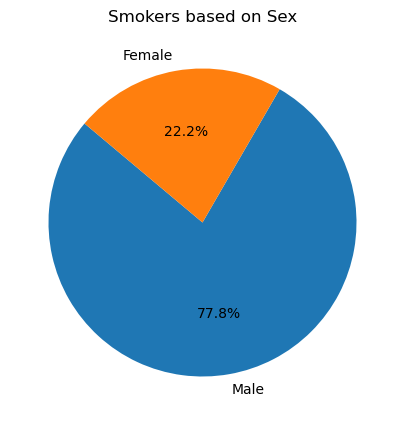

In [13]:
counts=data[data['Smoking']==1]['Sex'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Smokers based on Sex')
plt.show()

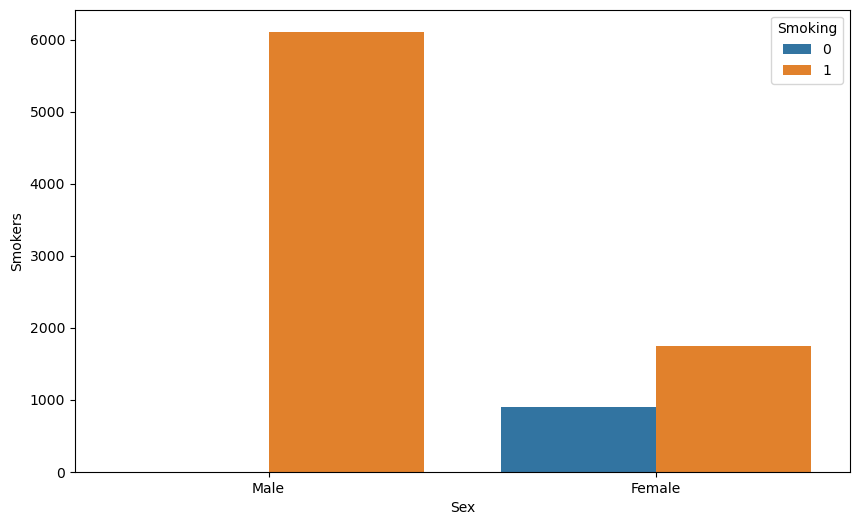

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data,x='Sex',hue='Smoking')
plt.xlabel('Sex')
plt.ylabel('Smokers')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
data['Sex']=enco.fit_transform(data['Sex'])
data['Diet']=enco.fit_transform(data['Diet'])

In [17]:
x=data.drop(['Heart Attack Risk'],axis=1)
y=data['Heart Attack Risk']

In [18]:
x

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,67,1,208,15888.0,72,0,0,1,0,0,4.168189,0,0,0,9,6.615001,31.251233,286,0,6
1,21,1,389,16593.0,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,27.194973,235,1,7
2,21,0,324,17499.0,72,1,0,0,0,0,2.078353,1,1,1,9,9.463426,28.176571,587,4,4
3,84,1,383,163100.0,73,1,1,1,0,1,9.828130,0,1,0,9,7.648981,36.464704,378,3,4
4,66,1,318,9188.0,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,21.809144,231,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,9476.0,61,1,1,1,0,1,7.917342,1,1,1,8,10.806373,19.655895,67,7,7
8759,28,0,120,157102.0,73,1,0,0,1,0,16.558426,1,0,0,8,3.833038,23.993866,617,4,9
8760,47,1,250,16175.0,105,0,1,1,1,1,3.148438,0,1,0,5,2.375214,35.406146,527,4,4
8761,36,1,178,11967.0,60,1,0,1,0,0,3.789950,2,1,1,5,0.029104,27.294020,114,2,8


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score
yhat=lr.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,yhat))

Accuracy score:  0.6451796919566457


In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
yhat2=rfc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,yhat2))

Accuracy score:  0.6320593268682259
